In [1]:
%matplotlib inline

import autorootcwd
from src.ours import plot_csi_amplitude, compression_pipeline, convert_csi_to_amplitude, butter_lowpass_filter, hampel_filter, ema_detrending, preprocess_pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import glob

ACTIVITY_CSI_PATH = r"data\raw\raw_activity_csi\L0382_ESP_8_20250521_142010.csv"
NO_ACTIVITY_CSI_PATH = r"data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141708.csv"


PCA Reconstruction MSE Score: 0.4917175049072616


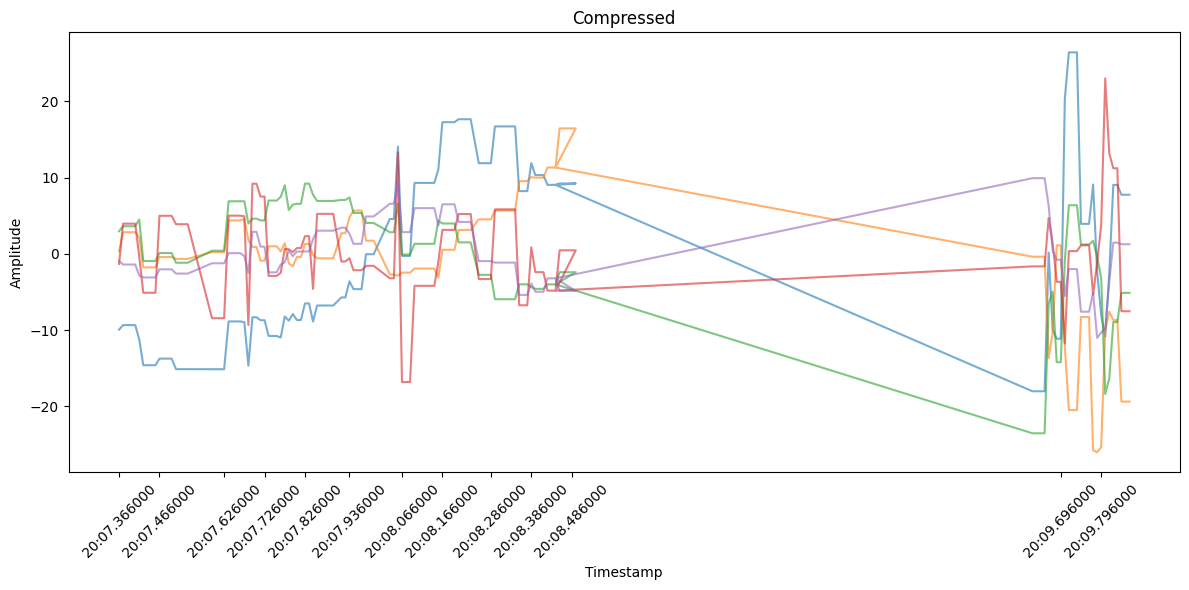

In [21]:
filtered_sig, original_sig, ts = preprocess_pipeline(CSI_PATH=ACTIVITY_CSI_PATH)

from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
pca.fit(original_sig)
compressed_signal = pca.fit_transform(original_sig)
reconstructed_signal = pca.inverse_transform(compressed_signal)
mse_score = np.mean((original_sig - reconstructed_signal)**2)
print(f"PCA Reconstruction MSE Score: {mse_score}")
plot_csi_amplitude(compressed_signal, ts, title=f'Compressed', FRAME_NUM=500)

PCA Reconstruction MSE Score: 0.056986933145960185


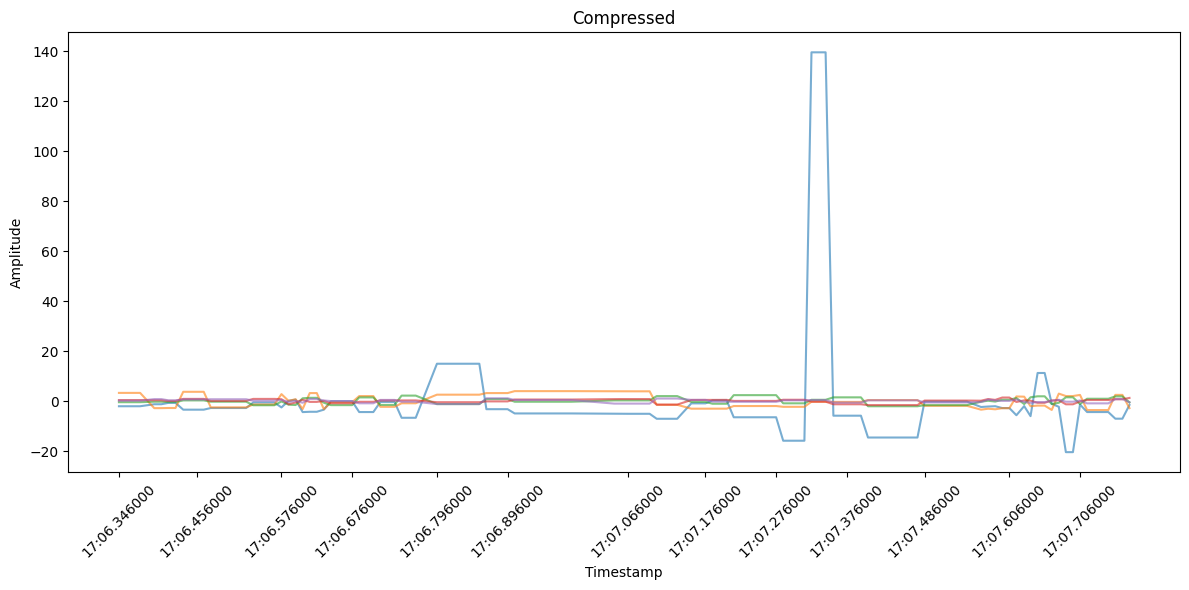

In [22]:
filtered_sig, original_sig, ts = preprocess_pipeline(CSI_PATH=NO_ACTIVITY_CSI_PATH)

from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
pca.fit(original_sig)
compressed_signal = pca.fit_transform(original_sig)

reconstructed_signal = pca.inverse_transform(compressed_signal)
mse_score = np.mean((original_sig - reconstructed_signal)**2)
print(f"PCA Reconstruction MSE Score: {mse_score}")

plot_csi_amplitude(compressed_signal, ts, title=f'Compressed', FRAME_NUM=500)

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142006.csv


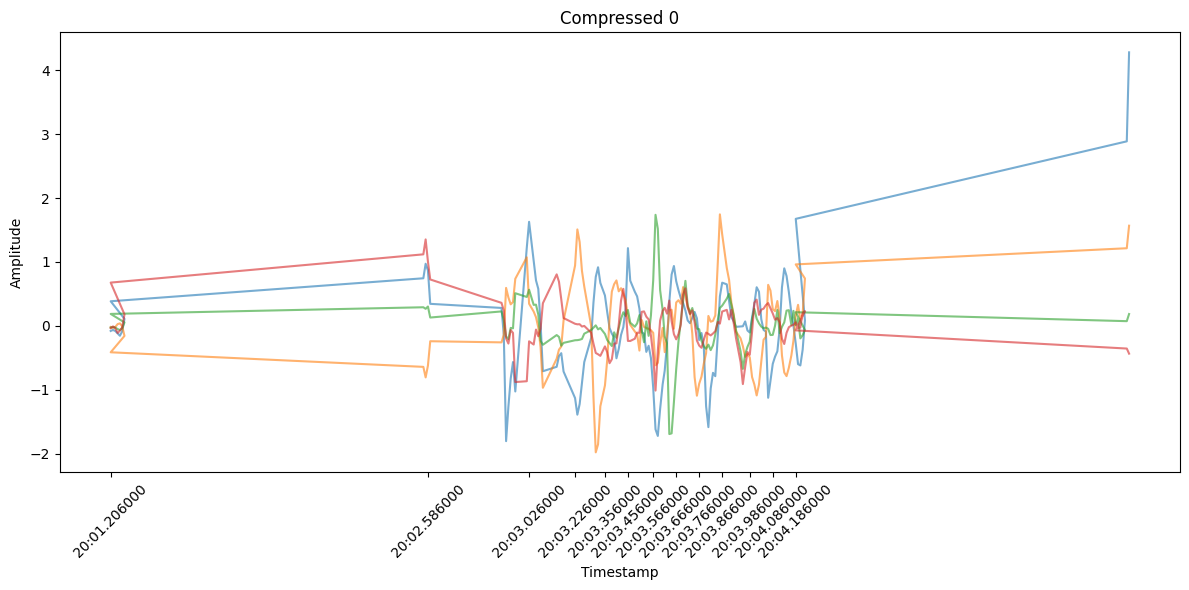

0.011125202514038238
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142007.csv


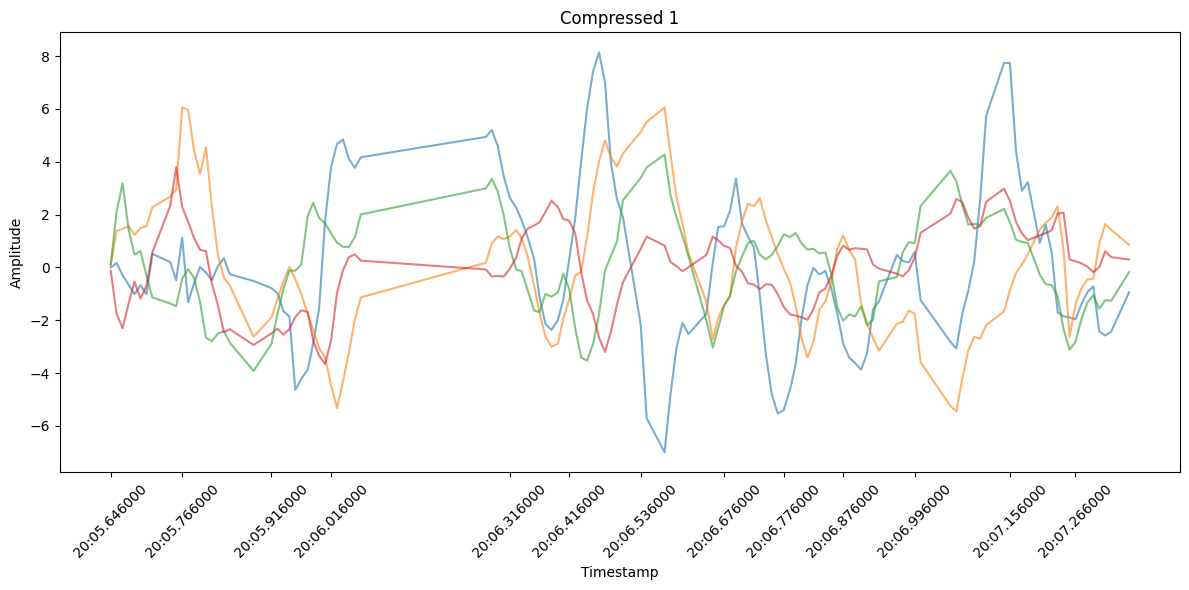

0.11599023564599029
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142010.csv


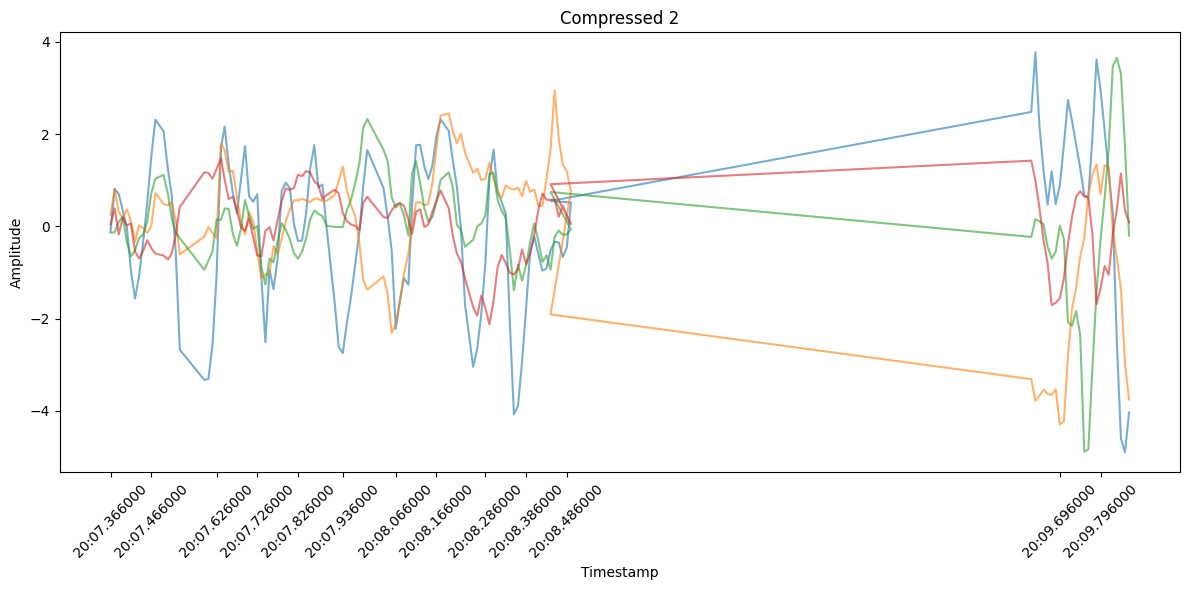

0.04177827528895595
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142012.csv


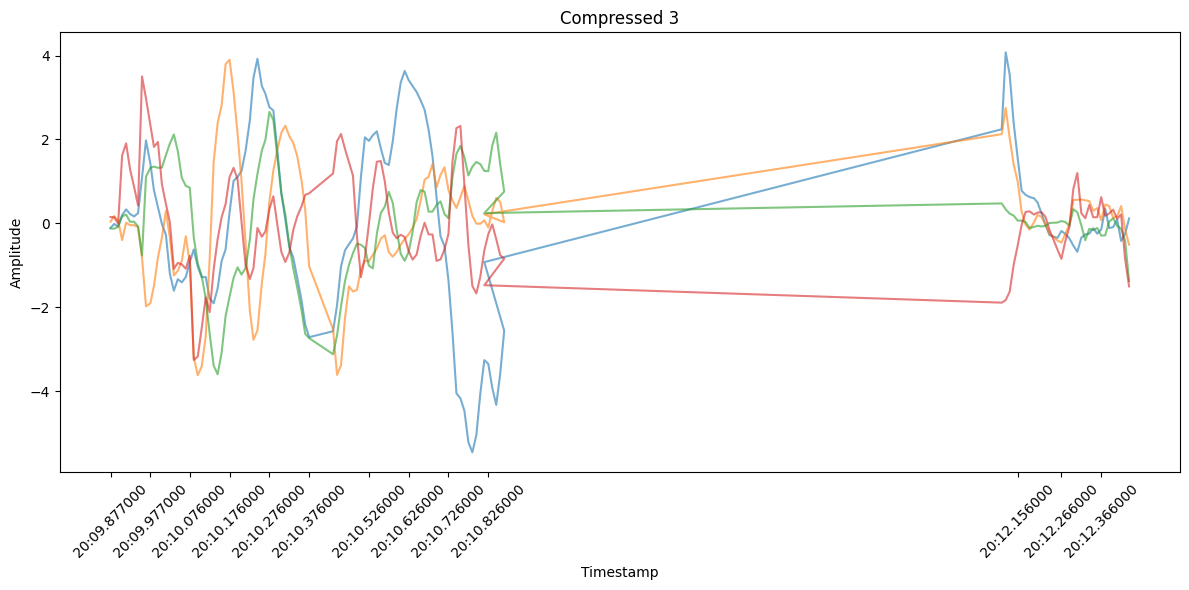

0.04887949955822049
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142017.csv


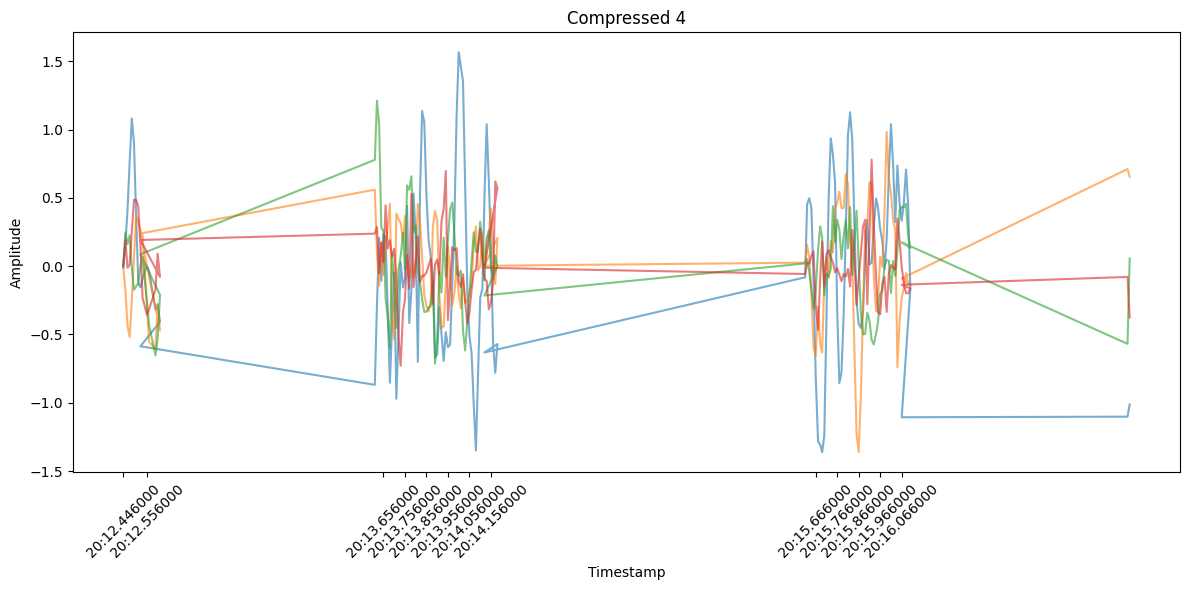

0.011259986478688143
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142020.csv


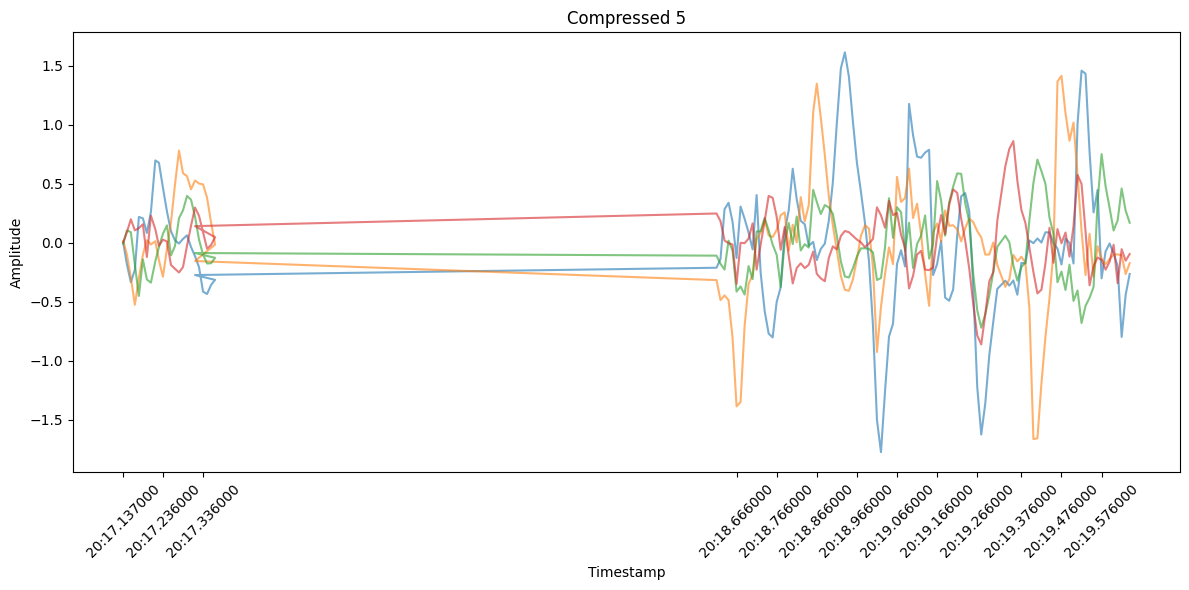

0.009484032705425964
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142021.csv


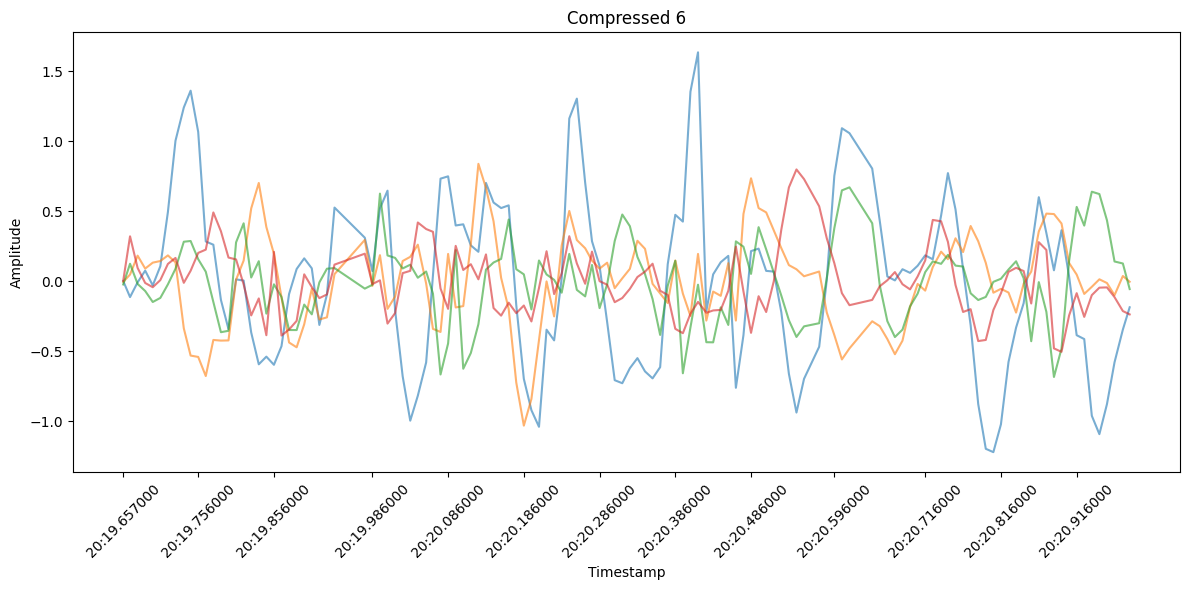

0.009778801252382289
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142025.csv


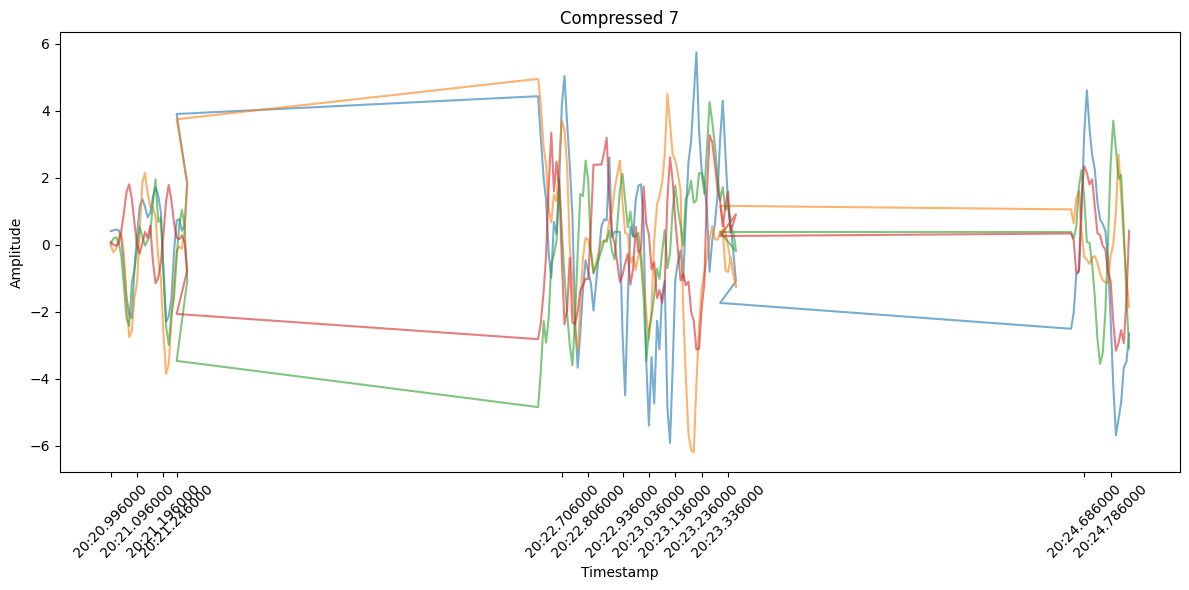

0.13788278774132345
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142026.csv


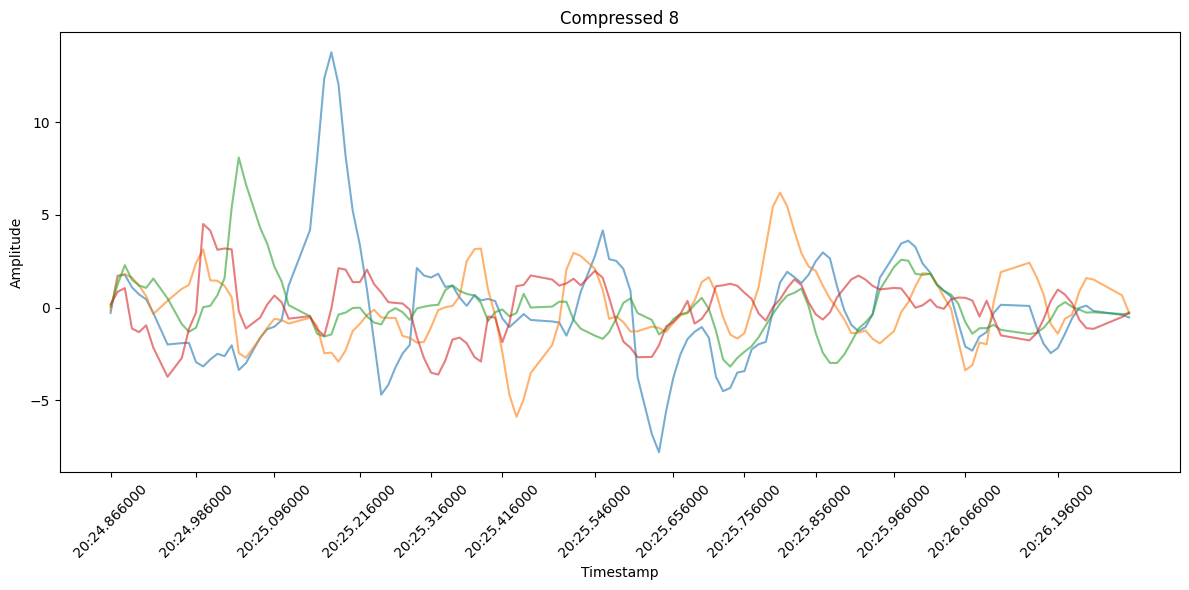

0.11416239969663235
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142028.csv


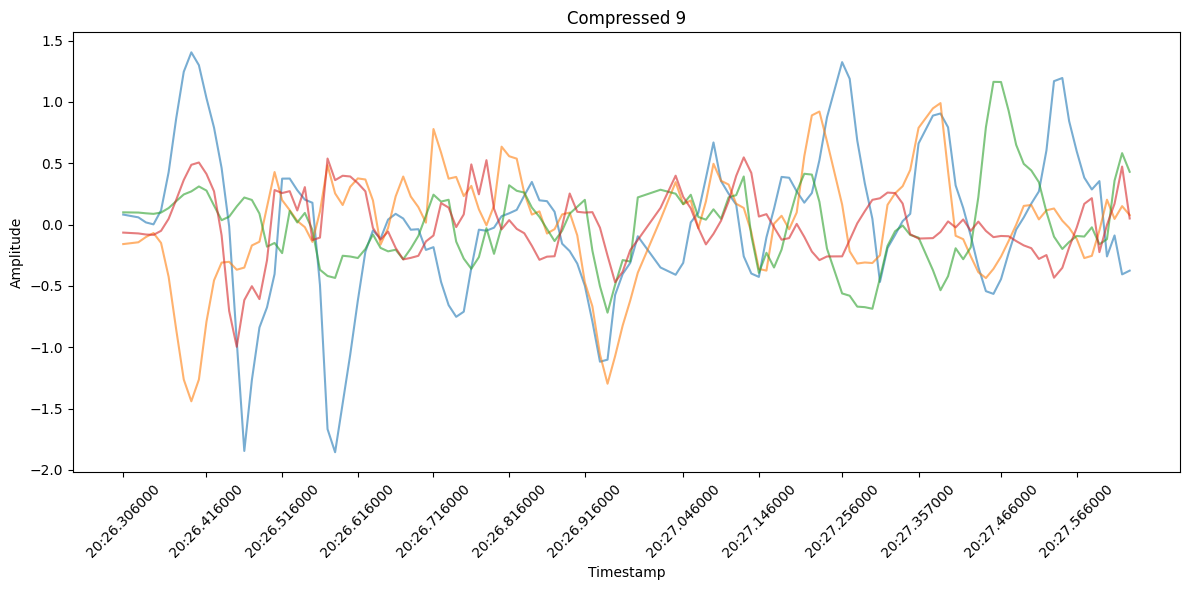

0.008108308512148343
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142029.csv


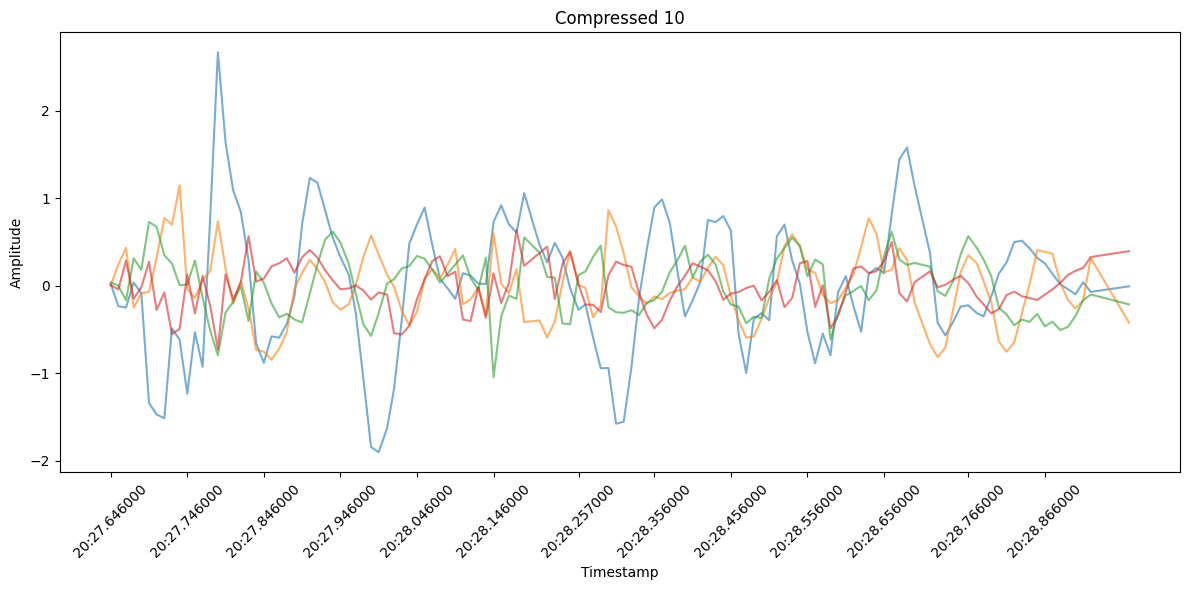

0.011561639627543351
data\raw\raw_activity_csi\L0382_ESP_8_20250521_142030.csv


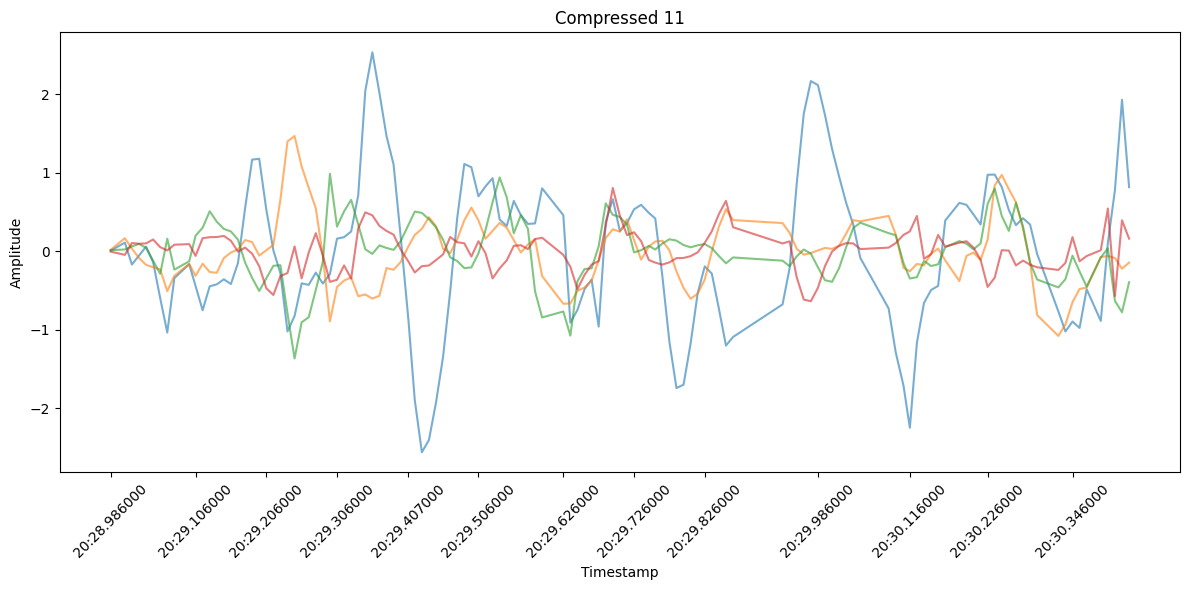

0.010314398754742634


In [8]:
ACTIVITY_CSI_PATHS = glob.glob(r"data\raw\raw_activity_csi\*.csv")
for idx, csv_file in enumerate(ACTIVITY_CSI_PATHS):
    print(csv_file)
    activity_sig, original_sig, ts = preprocess_pipeline(CSI_PATH=csv_file)
    sig, mse_score = compression_pipeline(activity_sig)
    plot_csi_amplitude(sig[:,1:], ts, title=f'Compressed {idx}', FRAME_NUM=500)
    print(mse_score)
    if idx > 10:
        break


data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141704.csv


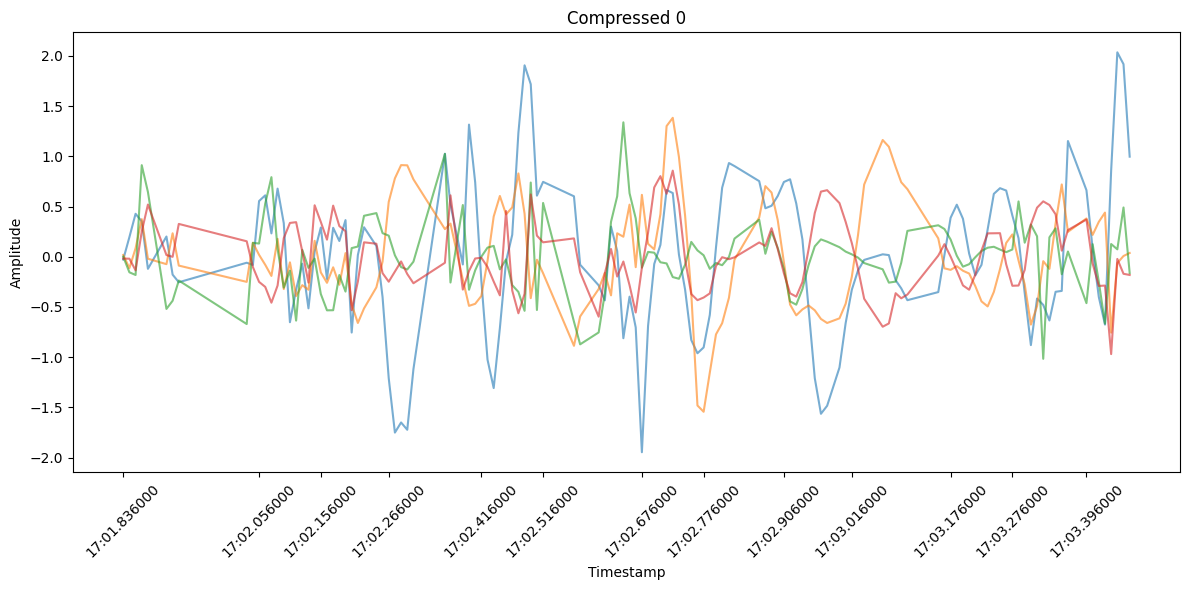

0.016728575071174222
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141705.csv


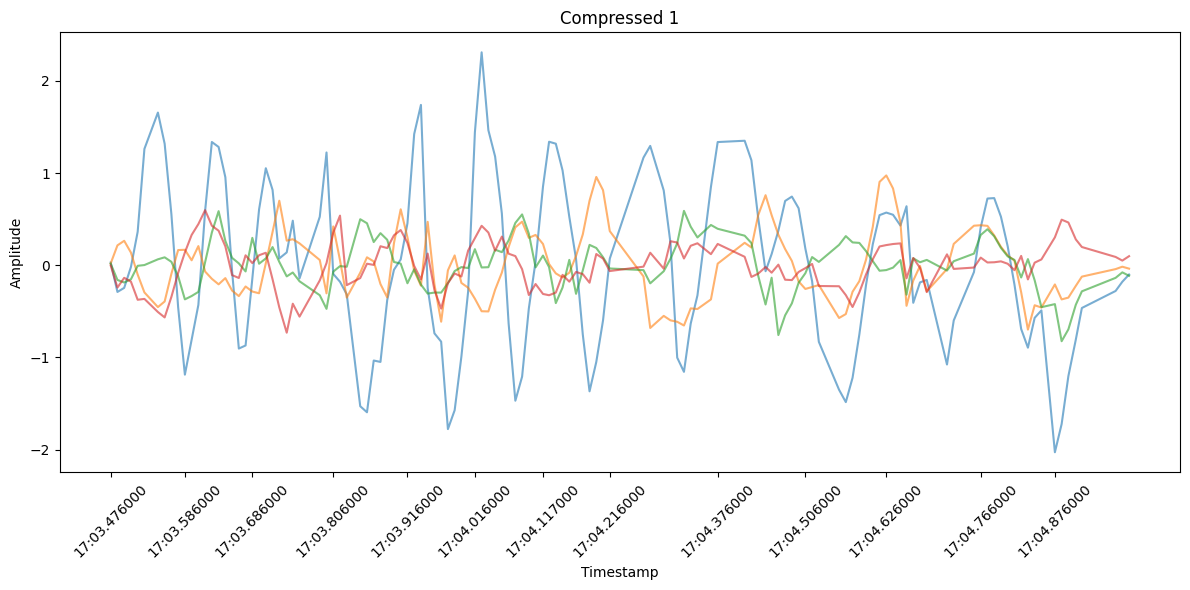

0.010633255199813342
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141706.csv


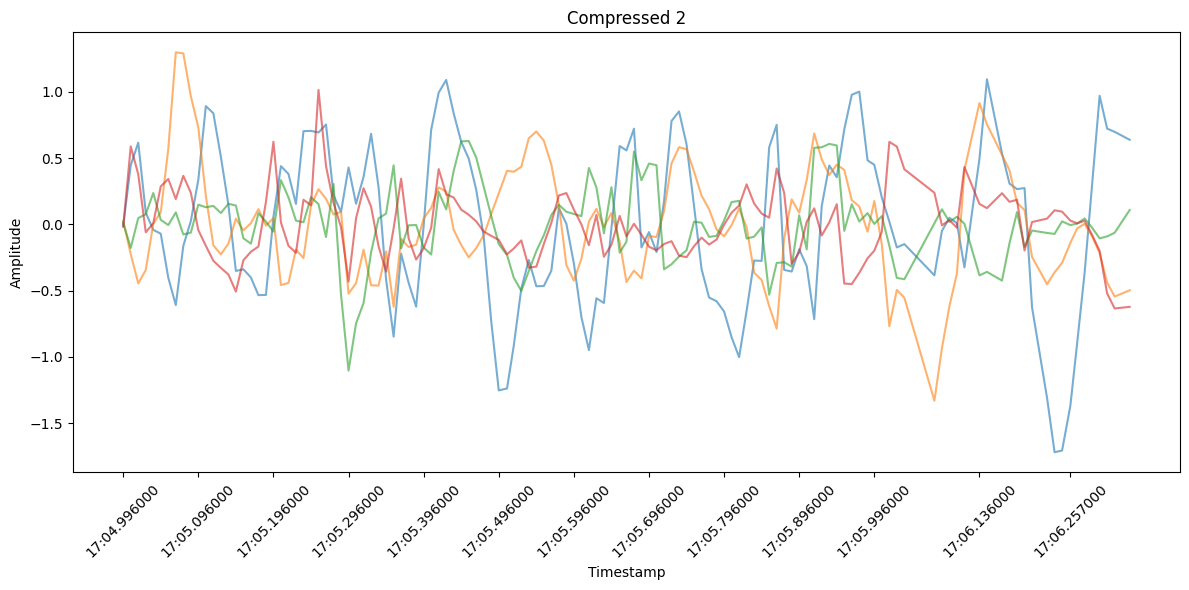

0.010965036116617253
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141708.csv


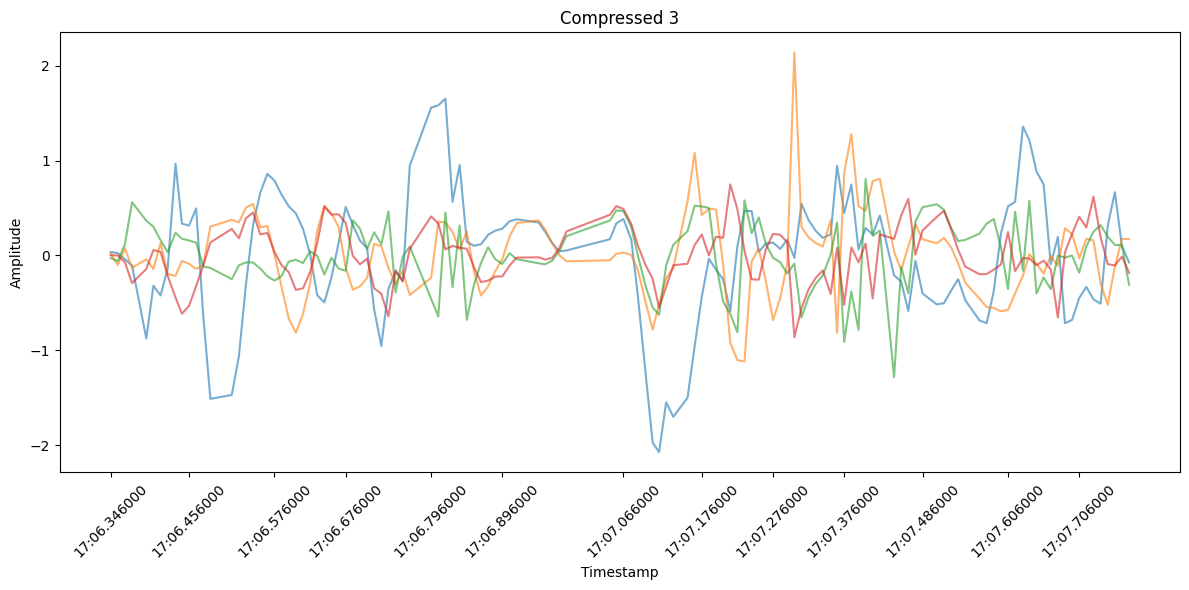

0.012151935272973178
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141709.csv


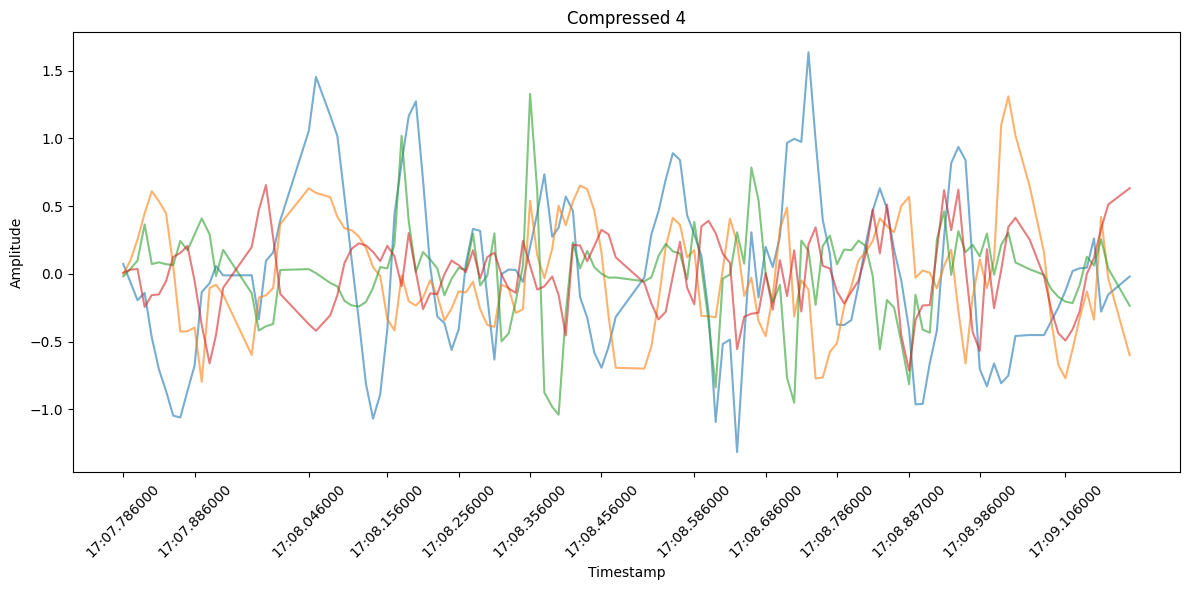

0.014017205533398584
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141711.csv


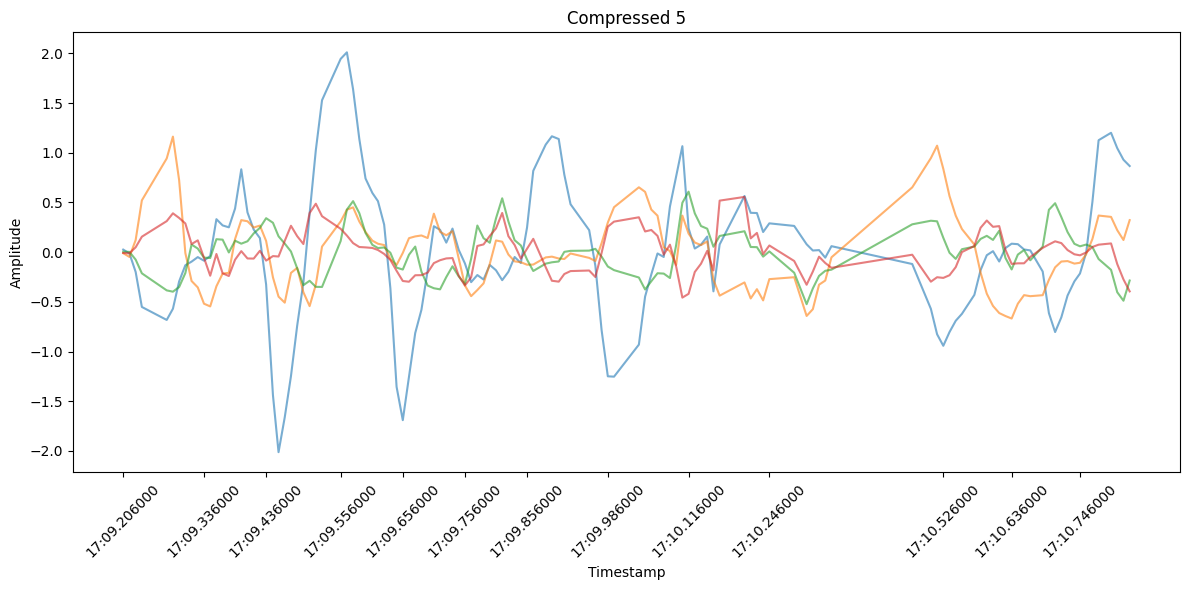

0.005407609787460886
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141712.csv


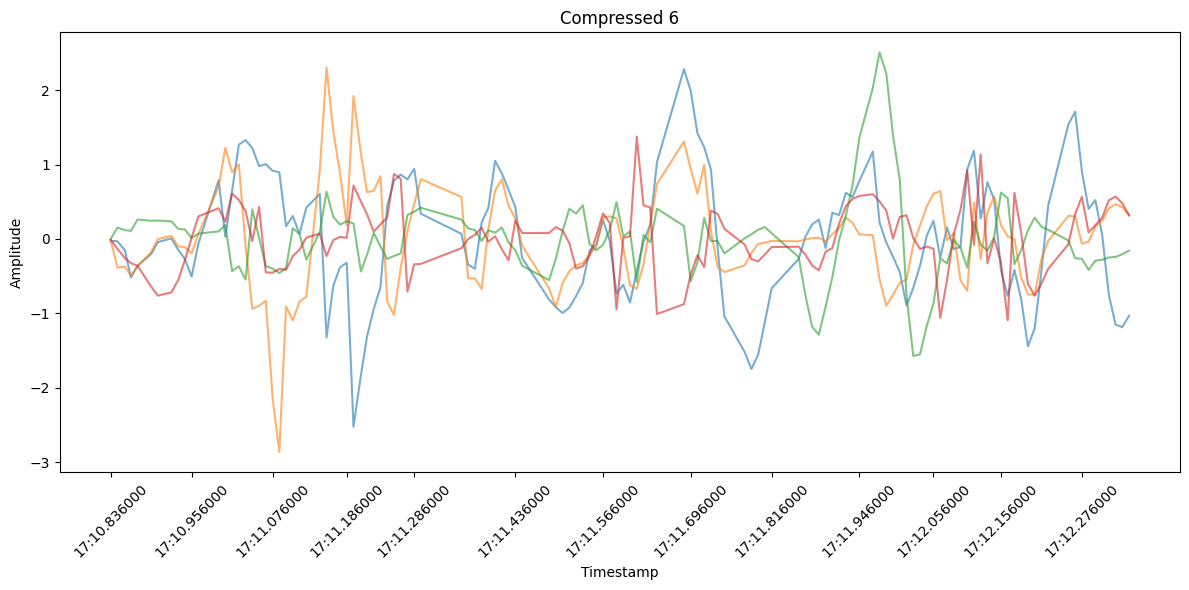

0.023623271299137286
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141714.csv


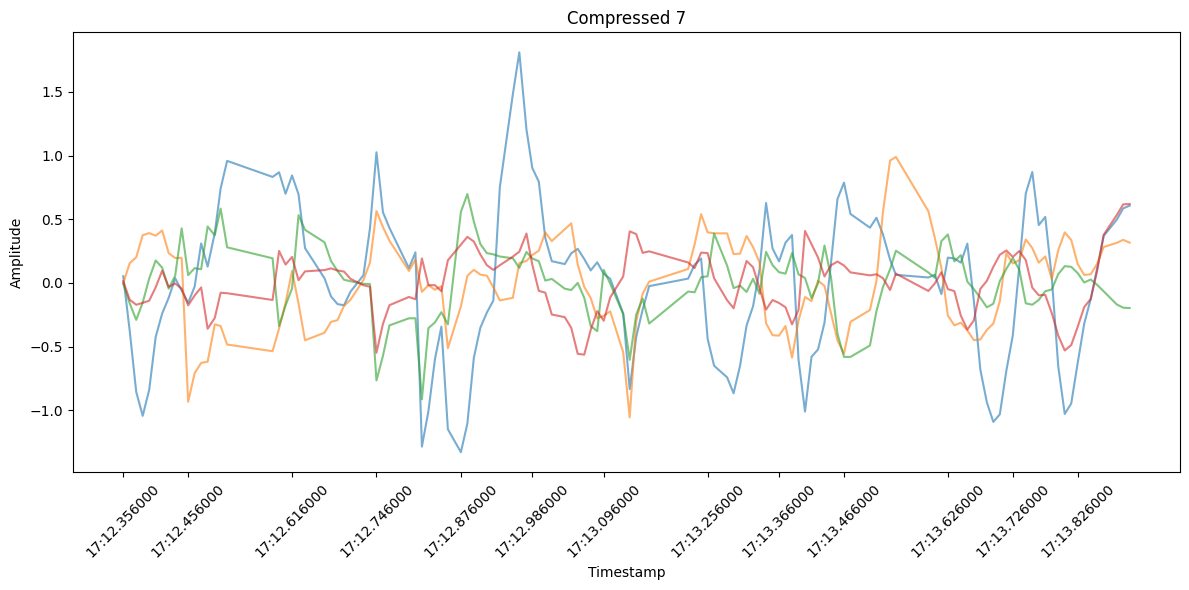

0.007898795401773167
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141715.csv


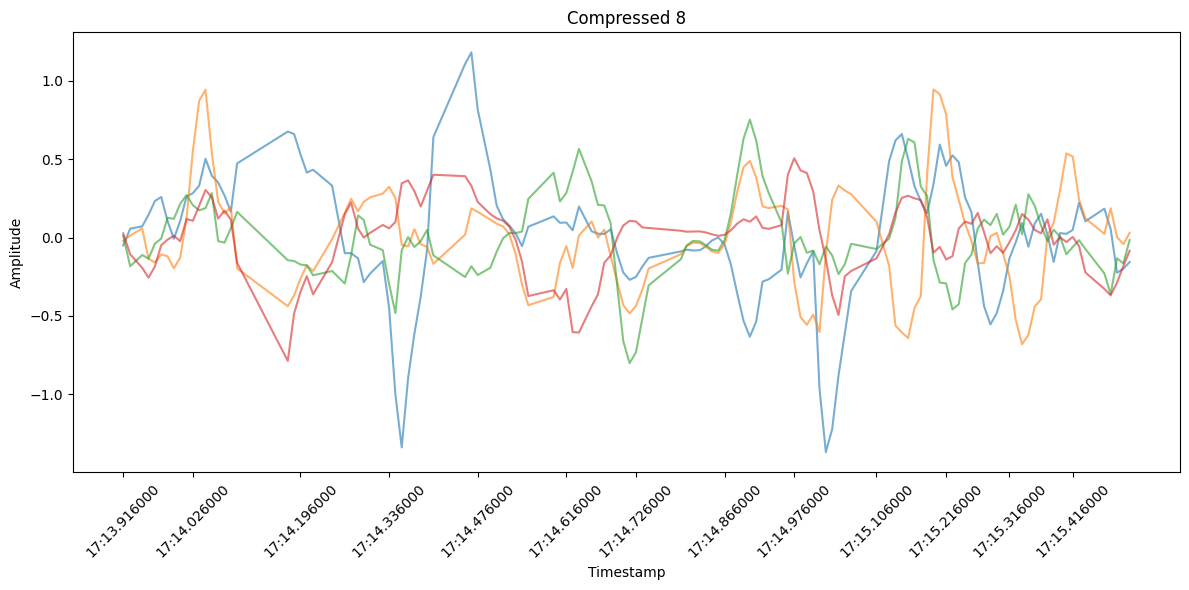

0.00573245328452208
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141717.csv


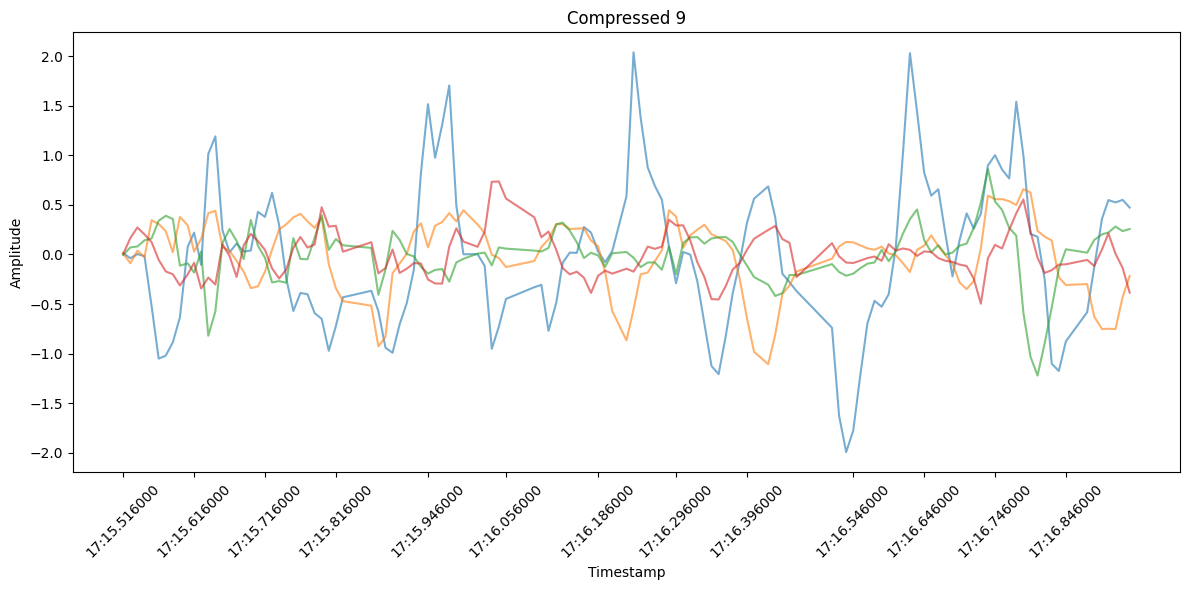

0.008538263750060407
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141718.csv


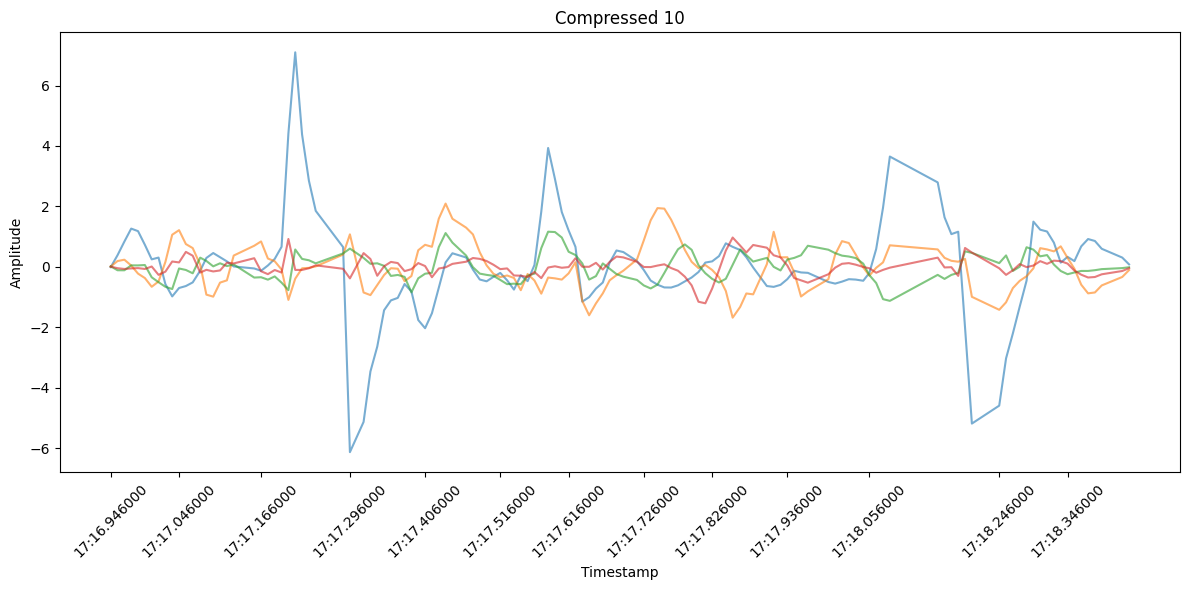

0.015116361725608023
data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141720.csv


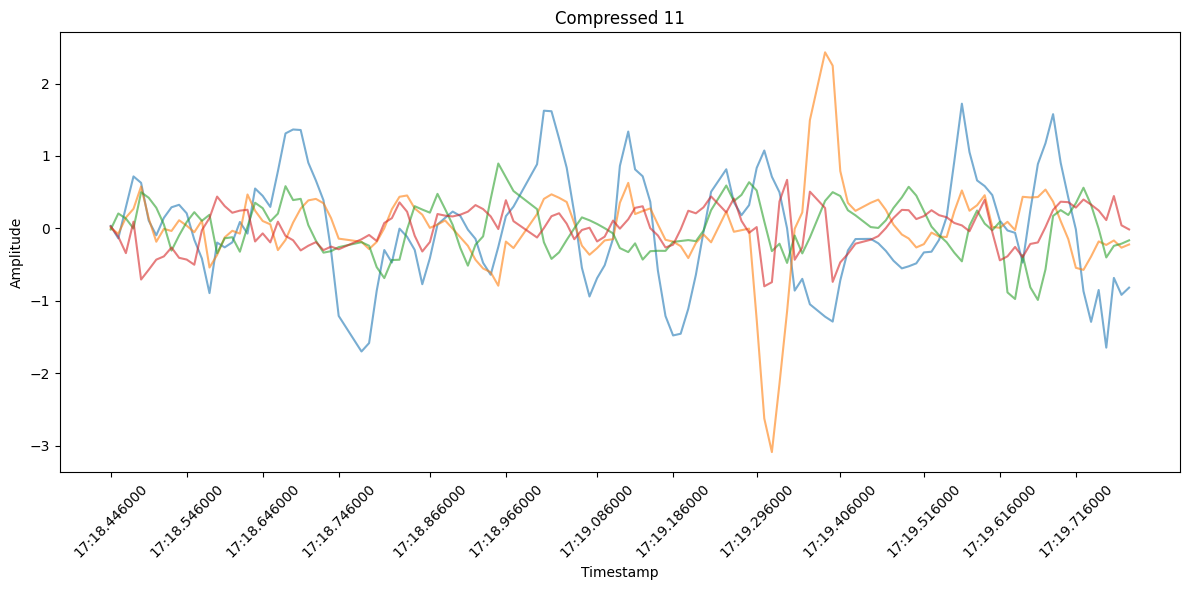

0.013938455306550263


In [7]:
NO_ACTIVITY_CSI_PATHS = glob.glob(r"data\raw\raw_noActivity_csi\*.csv")
for idx, csv_file in enumerate(NO_ACTIVITY_CSI_PATHS):
    print(csv_file)
    activity_sig, original_sig, ts = preprocess_pipeline(CSI_PATH=csv_file)
    sig, mse_score = compression_pipeline(activity_sig)
    plot_csi_amplitude(sig[:,1:], ts, title=f'Compressed {idx}', FRAME_NUM=500)
    print(mse_score)
    if idx > 10:
        break